# 2. Investigating relationship between variables
** **
## Table of contents:

1. Importing libraries <br>
2. Importing dataframe <br>
3. Creating a subset <br>
4. Investigating relationship between variables
    - 4.1 Correlation Matrix
    - 4.2 Correlation Heatmap
    - 4.3 Scatterplots
        - 4.3.1 Energy consumption and Energy production
        - 4.3.2 Energy consumption and CO2 emissions
        - 4.3.3 Energy production and CO2 emissions
        - 4.3.4 GDP and Population
        - 4.3.5 CO2 emissions and GDP
        - 4.3.6 CO2 emissions and Population
        - 4.3.7 Summary
    - 4.4 Pair plots
    - 4.5 Categorical plot
5. Key questions
6. Hypothesis
7. Saving charts

# 1. Importing libraries
** **

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

# 2. Importing dataframe
** **

In [2]:
# Creating a path variabile for the folder
path = r'C:\Users\Simone\Desktop\Career Foundry\Esercizi modulo 7\CO2 emissions analysis'

In [3]:
# Importing the dataframe
df_co2_2015 = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean_2015.pkl'))

In [4]:
# Printing the first 5 rows
df_co2_2015.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
48510,World,all_energy_types,2015,567.33,568.56,111935.9,7379227.0,76.88,5.07,34894.26,High
48511,World,coal,2015,167.56,167.60,111935.9,7379227.0,76.88,5.07,16382.29,High
48512,World,natural_gas,2015,130.05,129.64,111935.9,7379227.0,76.88,5.07,6783.65,High
48513,World,petroleum_n_other_liquids,2015,189.34,187.84,111935.9,7379227.0,76.88,5.07,11728.32,High
48514,World,nuclear,2015,25.44,25.44,111935.9,7379227.0,76.88,5.07,0.00,High


The index is the same as the original dataframe (before subsetting).

In [5]:
# Resetting the index
df_co2_2015 = df_co2_2015.reset_index(drop = True)

In [6]:
# Printing again the first 5 rows
df_co2_2015.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
0,World,all_energy_types,2015,567.33,568.56,111935.9,7379227.0,76.88,5.07,34894.26,High
1,World,coal,2015,167.56,167.60,111935.9,7379227.0,76.88,5.07,16382.29,High
2,World,natural_gas,2015,130.05,129.64,111935.9,7379227.0,76.88,5.07,6783.65,High
3,World,petroleum_n_other_liquids,2015,189.34,187.84,111935.9,7379227.0,76.88,5.07,11728.32,High
4,World,nuclear,2015,25.44,25.44,111935.9,7379227.0,76.88,5.07,0.00,High


Index has been succesfully reset.

In [7]:
# Checking the shape
df_co2_2015.shape

(6930, 11)

# 3. Creating a subset
** **

We are going to do some analysis regarding only numerical values. <br>
For this reasons I am going to create a dataframe containing only the variables needed for this purpose. <br>
I will discard Country, Energy_type, Year and GDP category.

In [8]:
# Creating a subset
df_sub = df_co2_2015[['Energy_consumption', 'Energy_production', 'GDP', 'Population','Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']]

In [9]:
# Printing the first 5 rows
df_sub.head()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,567.33,568.56,111935.9,7379227.0,76.88,5.07,34894.26
1,167.56,167.60,111935.9,7379227.0,76.88,5.07,16382.29
2,130.05,129.64,111935.9,7379227.0,76.88,5.07,6783.65
3,189.34,187.84,111935.9,7379227.0,76.88,5.07,11728.32
4,25.44,25.44,111935.9,7379227.0,76.88,5.07,0.00


# 4. Investigating relationship between variables
** **

In this section we are going to investigate relationship between variables through various charts. <br>
First of all, I have to make some preparatory steps with my matplotlib library.

In [10]:
# Checking my matplotlib version
matplotlib.__version__

'3.7.0'

The version is up to date.

In [11]:
# This option ensures the charts I am creating are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 4.1 Correlation Matrix

First of all, I am going to create a correlation matrix.

In [12]:
df_sub.corr()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Energy_consumption,1.000000,0.994012,0.718874,0.707819,0.038870,0.065889,0.981517
Energy_production,0.994012,1.000000,0.715500,0.703739,0.051063,0.077417,0.973021
GDP,0.718874,0.715500,1.000000,0.985327,0.032627,0.053450,0.682534
Population,0.707819,0.703739,0.985327,1.000000,-0.011923,0.039477,0.675447
Energy_intensity_per_capita,0.038870,0.051063,0.032627,-0.011923,1.000000,0.576756,0.031190
Energy_intensity_by_GDP,0.065889,0.077417,0.053450,0.039477,0.576756,1.000000,0.059451
CO2_emission,0.981517,0.973021,0.682534,0.675447,0.031190,0.059451,1.000000


Just from here we can see that there are some correlation coefficients very high and near to 1. <br>
But is difficult to understand the data in this tabular form, so we are going to create a correlation heatmap.

## 4.2 Correlation heatmap

Text(0.5, 1.0, 'Correlation Matrix')

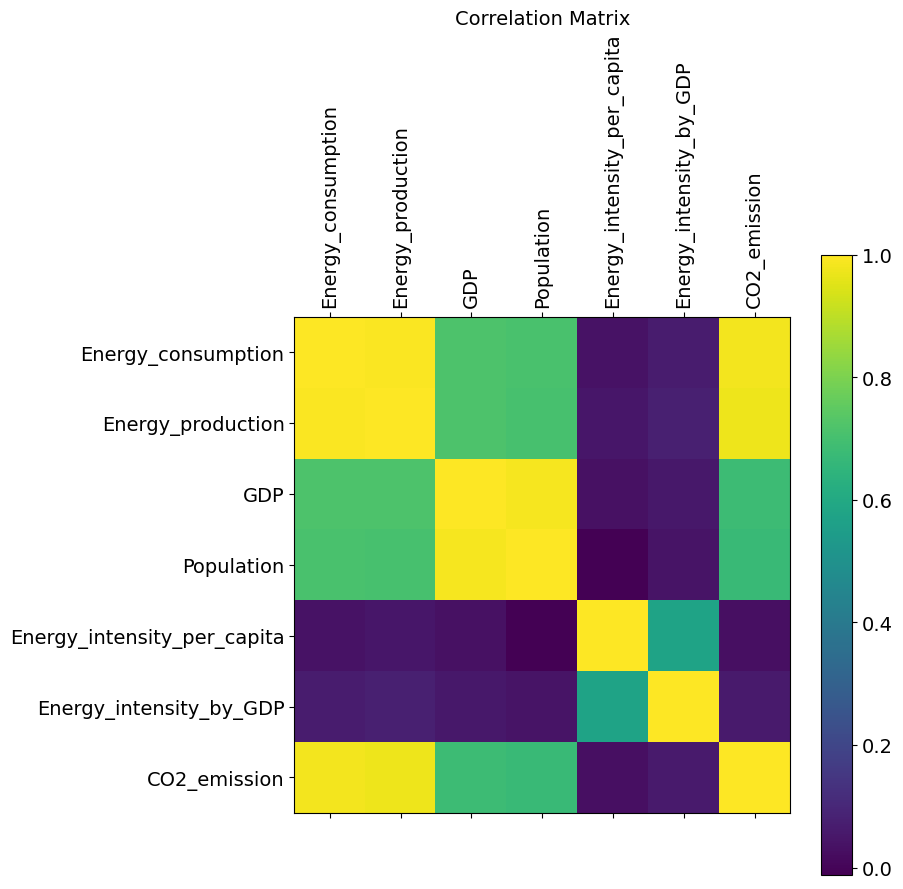

In [13]:
# Creating a correlation heatmap

corr_figure = plt.figure(figsize=(8, 8)) # Size of the figure
plt.matshow(df_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
corr_cb = plt.colorbar() # add a colorbar
corr_cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

This is giving us some informations, but is missing the values of the correlation coeficcients. <br>
I am  going to create the correlation heatmap using seaborn.

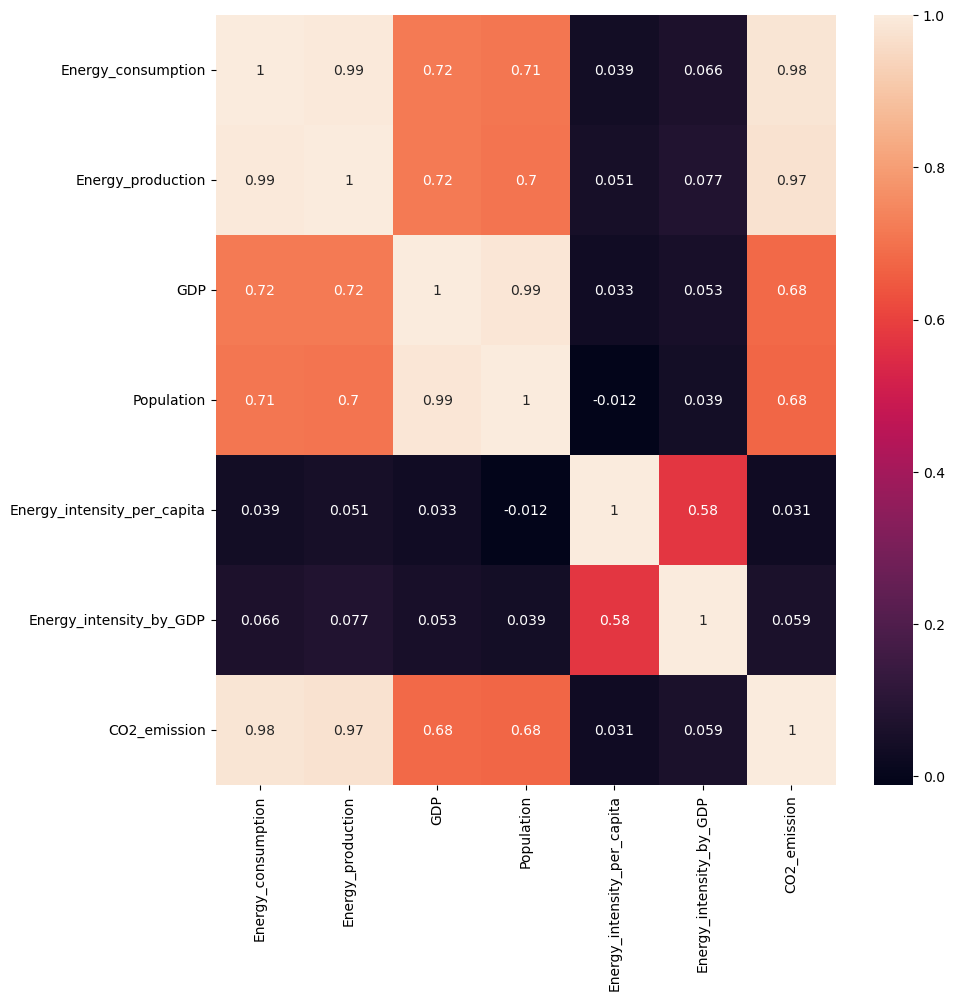

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

Much better! According to this heatmap, relationship are represented with the following colors: <br>
<b> Very Strong </b>: Cream (the lightest color) <br>
<b> Fairly Strong </b>: Orange <br>
<b> Moderate </b>: Red <br>
<b> Weak or no relationship at all </b>: Black <br>

So, based on the heatmap, we can affirm that: <br>
<br>
<b> ENERGY_CONSUMPTION: </b>
- Very strong relationship with:
     - Energy_production
     - CO2_emission
- Fairly strong relationship with:
     - GDP
     - Population

<b> ENERGY_PRODUCTION: </b>
- Very strong relationship with:
     - Energy_consumption
     - CO2_emission
- Fairly strong relationship with:
     - GDP
     - Population

<b> GDP: </b>
- Very strong relationship with:
     - Population
- Fairly strong relationship with:
     - Energy_consumption
     - Energy_production
     - CO2_emission

<b> POPULATION: </b>
- Very strong relationship with:
     - GDP
- Fairly strong relationship with:
     - Energy_consumption
     - Energy_production
     - CO2_emission

<b> ENERGY_INTENSITY_PER_CAPITA: </b>
- Moderate relationship with:
    - Energy_intensity_by_GDP

<b> ENERGY_INTENSITY_BY_GDP: </b>
- Moderate relationship with:
    - Energy_intensity_per_capita

<b> CO2_EMISSION: </b>
- Very strong relationship with:
     - Energy_consumption
     - Energy_production
- Fairly strong relationship with:
     - GDP
     - Population

Based on the results above, I think the following relationships should be investigated further:
- Energy_consumption and Energy_production
- Energy_consumption and CO2_emission
- Energy_production and CO2_emission
- GDP and Population
- CO2_emission and GDP
- CO2_emission and Population

## 4.3 Scatterplots

We have found out that some variables have an high correlation coefficient. <br>
However, we have to find out if this correlation is linear, to understand if the correlation is functional. <br>
If it's linear, it means that one variable can have an impact on the other and vice versa.

### 4.3.1 Energy consumption and Energy production

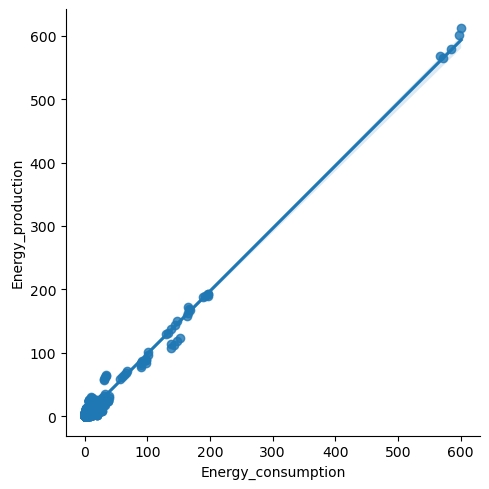

In [15]:
sns.lmplot(x = 'Energy_consumption', y = 'Energy_production', data = df_sub)

<b> Observations: </b> <br>
The correlation coefficient was 0,99. Plus the trendline has a clear direction (upwards). <br>
Additionally, the datapoints are clustered around the trendline. <br>
According to data, the relationship between the two variables is <b>linear</b>.

However, it seems that there are 5 datapoints that are very distant from the lower cluster. <br>
I think this needs to be investigated further.

In [16]:
# Creating a test dataframe to check the highest values
df_co2_2015_test = df_co2_2015.loc[df_co2_2015['Energy_consumption'] > 500]

In [17]:
df_co2_2015_test.head(20)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
0,World,all_energy_types,2015,567.33,568.56,111935.90,7379227.0,76.88,5.07,34894.26,High
1386,World,all_energy_types,2016,572.16,564.58,115567.88,7464043.0,76.66,4.95,34751.61,High
2772,World,all_energy_types,2017,584.20,578.25,119854.32,7548344.0,77.39,4.87,34572.38,High
4158,World,all_energy_types,2018,597.74,600.73,124161.99,7632247.0,78.32,4.81,35002.90,High
5544,World,all_energy_types,2019,601.04,611.51,127690.25,7714631.0,77.91,4.71,35584.93,High


So, it's the "World" country. I guess you can intend it as a sum of all countries. <br>
No wonder why it was so distant from other datapoints.
I will try to create a new subset that excludes those values that are some kind of "outliers".

In [18]:
# Creating a new dataframe
df_sub_no_world = df_sub.loc[(df_sub['Energy_consumption'] <= 500) | (df_sub['Energy_consumption'].isnull())]

In [19]:
# Testing the new dataframe
df_sub_no_world.head(10)

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1,167.56,167.60,111935.90,7379227.0,76.88,5.07,16382.29
2,130.05,129.64,111935.90,7379227.0,76.88,5.07,6783.65
3,189.34,187.84,111935.90,7379227.0,76.88,5.07,11728.32
4,25.44,25.44,111935.90,7379227.0,76.88,5.07,0.00
5,56.11,58.04,111935.90,7379227.0,76.88,5.07,0.00
6,0.13,0.04,72.06,34414.0,3.67,1.75,7.17
7,0.03,0.03,72.06,34414.0,3.67,1.75,2.95
8,0.01,0.01,72.06,34414.0,3.67,1.75,0.28
9,0.07,0.00,72.06,34414.0,3.67,1.75,3.94
10,NaN,NaN,72.06,34414.0,3.67,1.75,0.00


In [20]:
# Checking the shape
df_sub_no_world.shape

(6925, 7)

5 records related to "World" country removed successfully.

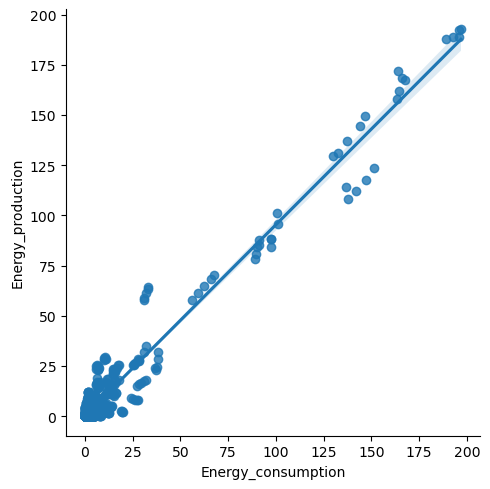

In [21]:
# Creating again the scatterplot without the "world" records
scatter_cons_prod = sns.lmplot(x = 'Energy_consumption', y = 'Energy_production', data = df_sub_no_world)

This makes much more sense! However, what we said earlier is still valid. <br>
The correlation coefficient was 0,99. Plus the trendline has a clear direction (upwards). <br>
Additionally, the datapoints are clustered around the trendline. <br>
According to data, the relationship between the two variables is <b>linear</b>.

### 4.3.2 Energy consumption and CO2 emissions

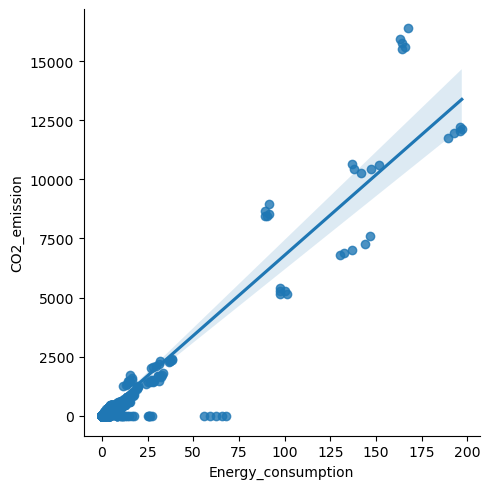

In [22]:
# Creating the scatterplot without the "world" records
sns.lmplot(x = 'Energy_consumption', y = 'CO2_emission', data = df_sub_no_world)

<b> Observations: </b> <br>
Here the situation is a bit different. Some data points are clustered around the trendline while some others not. <br>
I would like to investigate the highest values of CO2 emissions in the top right.

In [23]:
# Creating a test dataframe to check the highest values
df_co2_2015_test_2 = df_co2_2015.loc[df_co2_2015['CO2_emission'] > 15000]

In [24]:
# Checking the dataframe
df_co2_2015_test_2.head(20)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
0,World,all_energy_types,2015,567.33,568.56,111935.90,7379227.0,76.88,5.07,34894.26,High
1,World,coal,2015,167.56,167.60,111935.90,7379227.0,76.88,5.07,16382.29,High
1386,World,all_energy_types,2016,572.16,564.58,115567.88,7464043.0,76.66,4.95,34751.61,High
1387,World,coal,2016,163.27,157.78,115567.88,7464043.0,76.66,4.95,15926.20,High
2772,World,all_energy_types,2017,584.20,578.25,119854.32,7548344.0,77.39,4.87,34572.38,High
2773,World,coal,2017,164.24,162.09,119854.32,7548344.0,77.39,4.87,15514.19,High
4158,World,all_energy_types,2018,597.74,600.73,124161.99,7632247.0,78.32,4.81,35002.90,High
4159,World,coal,2018,165.89,168.31,124161.99,7632247.0,78.32,4.81,15608.52,High
5544,World,all_energy_types,2019,601.04,611.51,127690.25,7714631.0,77.91,4.71,35584.93,High
5545,World,coal,2019,163.97,171.84,127690.25,7714631.0,77.91,4.71,15773.07,High


It's still the world variable. Of course, I removed it only in 5 records earlier. <br>
I think I need to solve this problem from the root.

In [25]:
# Creating a new dataframe filtering out "World" from the Country Variable
df_co2_2015_no_world = df_co2_2015.loc[df_co2_2015['Country'] != 'World']

In [26]:
df_co2_2015_no_world.head()

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
6,Afghanistan,all_energy_types,2015,0.13,0.04,72.06,34414.0,3.67,1.75,7.17,Medium-high
7,Afghanistan,coal,2015,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,Medium-high
8,Afghanistan,natural_gas,2015,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,Medium-high
9,Afghanistan,petroleum_n_other_liquids,2015,0.07,0.00,72.06,34414.0,3.67,1.75,3.94,Medium-high
10,Afghanistan,nuclear,2015,NaN,NaN,72.06,34414.0,3.67,1.75,0.00,Medium-high


In [27]:
df_co2_2015_no_world.shape

(6900, 11)

30 records removed from the original dataframe.

In [28]:
# Creating a new subset with only the columns we need
df_sub_filtered_world = df_co2_2015_no_world[['Energy_consumption', 'Energy_production', 'GDP', 'Population','Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']]

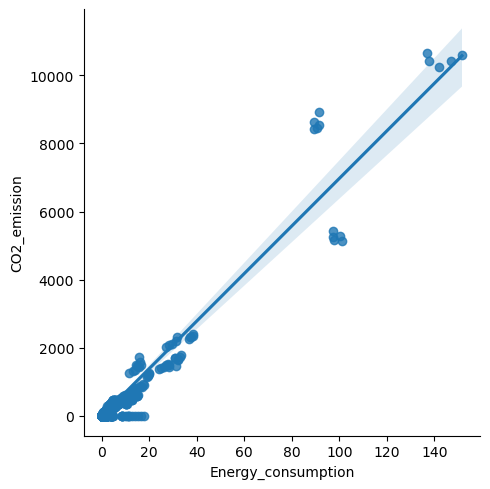

In [29]:
# Let's create again the scatterplot
scatter_cons_co2 = sns.lmplot(x = 'Energy_consumption', y = 'CO2_emission', data = df_sub_filtered_world)

<b> Observations: </b> <br>
There are definitely less outliers value now. <br>
Some datapoints are not clustered around the trendline, but in general it seems the relationship between these variables is <b> pretty linear</b>.

### 4.3.3 Energy production and CO2 emissions

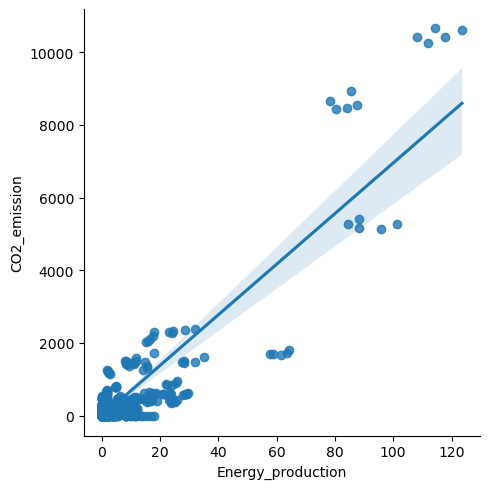

In [30]:
# Creating a scatterplot
scatter_prod_co2 = sns.lmplot(x = 'Energy_production', y = 'CO2_emission', data = df_sub_filtered_world)

<b> Observations: </b> <br>
Well it seems the relationship between energy production and CO2 emissions is <b>not linear</b>. <br>
Maybe it's because both variables are correlated to "energy_consumption". This might explain the high correlation coefficient between these two variables, even if the relations is not linear.

### 4.3.4 GDP and Population

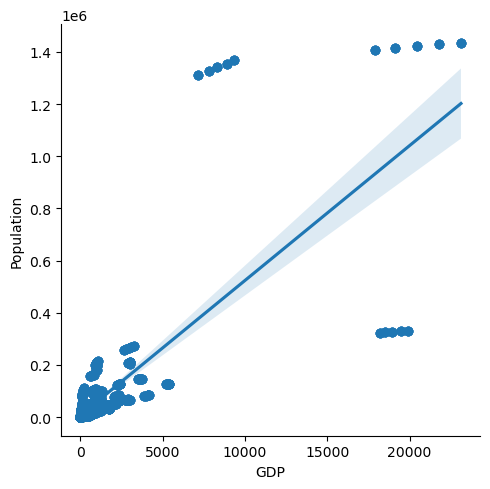

In [31]:
# Creating a scatterplot
scatter_gdp_pop = sns.lmplot(x = 'GDP', y = 'Population', data = df_sub_filtered_world)

<b> Observations: </b> <br>
Here there are also some datapoints far from trendline. We might as well investigate the values with highest population.

In [32]:
# Create a new dataset to investigate
df_co2_2015_no_world_test_pop = df_co2_2015_no_world.loc[df_co2_2015_no_world['Population'] > 1200000]

In [33]:
# Checking the head
df_co2_2015_no_world_test_pop.head(20)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
246,China,all_energy_types,2015,136.92,114.30,17895.85,1407740.0,97.26,7.65,10654.28,High
247,China,coal,2015,91.43,85.45,17895.85,1407740.0,97.26,7.65,8939.78,High
248,China,natural_gas,2015,7.04,4.90,17895.85,1407740.0,97.26,7.65,354.69,High
249,China,petroleum_n_other_liquids,2015,24.09,9.19,17895.85,1407740.0,97.26,7.65,1359.80,High
250,China,nuclear,2015,1.64,1.64,17895.85,1407740.0,97.26,7.65,0.00,High
251,China,renewables_n_other,2015,12.72,13.12,17895.85,1407740.0,97.26,7.65,0.00,High
594,India,all_energy_types,2015,27.18,15.06,7163.88,1311968.0,20.72,3.79,2021.86,High
595,India,coal,2015,15.05,9.90,7163.88,1311968.0,20.72,3.79,1447.31,High
596,India,natural_gas,2015,1.87,1.16,7163.88,1311968.0,20.72,3.79,102.55,High
597,India,petroleum_n_other_liquids,2015,7.97,1.77,7163.88,1311968.0,20.72,3.79,472.00,High


So it's China and India. Despite having both high population, China GDP is significatively higher compared to India.

I want to investigate also the data points with GDP higher than 15.000 but low number of population.

In [34]:
# Create a new dataset to investigate
df_co2_2015_no_world_test_gdp = df_co2_2015_no_world.loc[df_co2_2015_no_world['GDP'] > 15000]

In [35]:
df_co2_2015_no_world_test_gdp.head(20)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category
246,China,all_energy_types,2015,136.92,114.30,17895.85,1407740.0,97.26,7.65,10654.28,High
247,China,coal,2015,91.43,85.45,17895.85,1407740.0,97.26,7.65,8939.78,High
248,China,natural_gas,2015,7.04,4.90,17895.85,1407740.0,97.26,7.65,354.69,High
249,China,petroleum_n_other_liquids,2015,24.09,9.19,17895.85,1407740.0,97.26,7.65,1359.80,High
250,China,nuclear,2015,1.64,1.64,17895.85,1407740.0,97.26,7.65,0.00,High
251,China,renewables_n_other,2015,12.72,13.12,17895.85,1407740.0,97.26,7.65,0.00,High
1320,United States,all_energy_types,2015,97.39,88.28,18206.03,321618.0,302.82,5.35,5413.88,High
1321,United States,coal,2015,15.55,17.95,18206.03,321618.0,302.82,5.35,1713.37,High
1322,United States,natural_gas,2015,28.19,28.07,18206.03,321618.0,302.82,5.35,1437.54,High
1323,United States,petroleum_n_other_liquids,2015,36.74,24.18,18206.03,321618.0,302.82,5.35,2262.98,High


It's United States. USA GDP is higher than China, despite the population being significatively lower.

Basically the relationship <b>would be linear</b> excluding this three countries that are a sort of exceptions. <br>
China: High GDP and high population <br>
India: Low GDP and high population <br>
USA: High GDP and low population

### 4.3.5 CO2 emissions and GDP

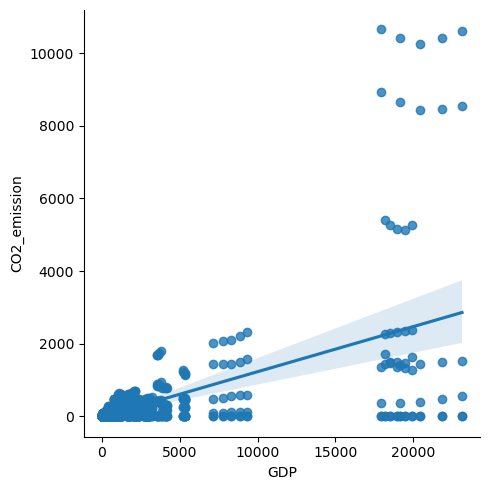

In [36]:
# Creating a scatterplot
scatter_co2_gdp = sns.lmplot(x = 'GDP', y = 'CO2_emission', data = df_sub_filtered_world)

<b> Observations: </b> <br>
So, the correlation coeficcient was around 0,7.
It seems that as a general rule the relationship between these two variables is <b> not linear</b>. <br>
Looking at the dataframe above (GDP being higher than 15.000), emissions around 5000 (milliontonnes) is USA (as sum of all energy sources). <br>
All values above 8000 are from China (coal + sum of all energy sources).

### 4.3.6 CO2 emissions and Population

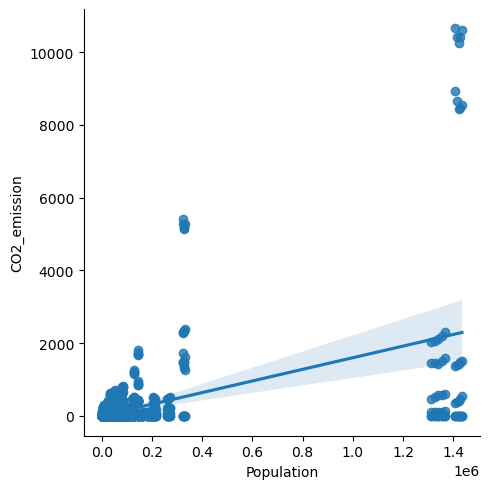

In [37]:
# Creating a scatterplot
scatter_co2_pop = sns.lmplot(x = 'Population', y = 'CO2_emission', data = df_sub_filtered_world)

<b> Observations: </b> <br>
Here the situation is the same.
I would consider the relationship between these two variables as <b> non linear</b>. <br>
USA and China are still  the two Countries with highest emissions, while China having an high population and USA having a low population.

### 4.3.7 Summary

- Created a new dataframe that filters "World" from Countries and keeps only the numerical columns: <br>
    - df_sub_filtered_world <br>
- Relationship between energy consumption and production: <b>linear</b> <br>
- Relationship between energy consumption and co2 emissions: <b>pretty linear</b> <br>
- Relationship between energy production and co2 emissions: <b>not linear</b> <br>
- Relationship between GDP and population: <b>linear if we exclude India, China and USA</b> <br>
- Relationship between CO2 emissions and GDP: <b>not linear</b> (USA and China have the highest emissions).
- Relationship between CO2 emissions and population: <b>not linear</b> (USA and China have the highest emissions).

## 4.4 Pair plots

In this section we create some pair plots. We will use the same dataframe but we will exclude the two variables that we did not use (Energy intensity).

In [38]:
df_sub_filtered_world_pair = df_sub_filtered_world[['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'CO2_emission']]

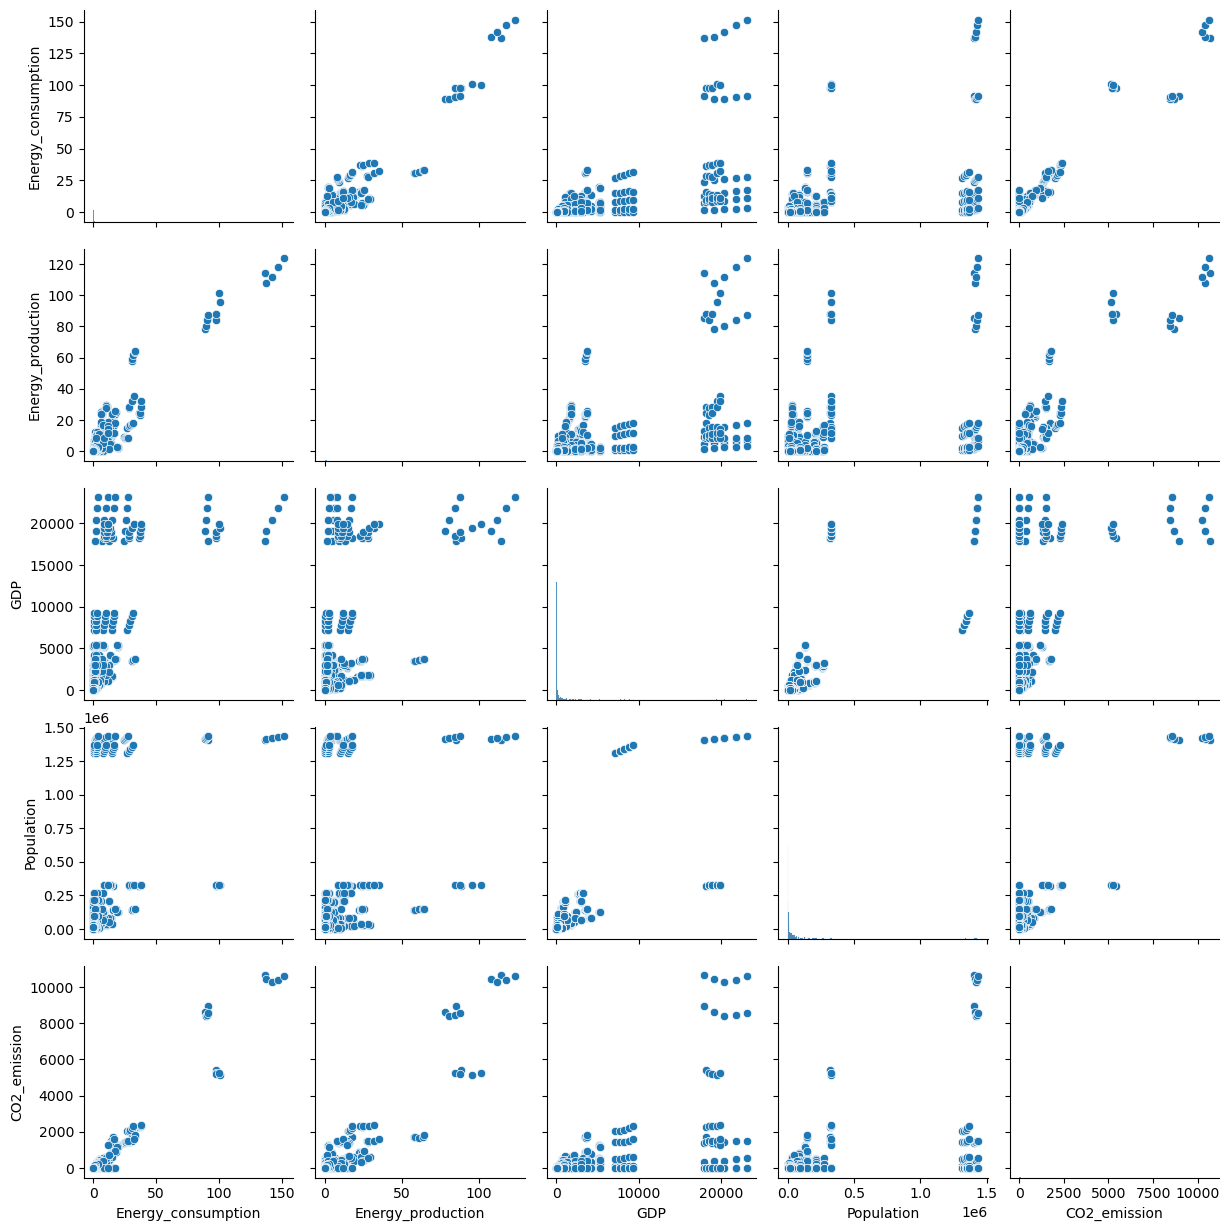

In [39]:
# Creating the pair plot
pair_no_world = sns.pairplot(df_sub_filtered_world_pair)

<b> Observations: </b> <br>
There isn't actually much to say, because I already created and investigated the majority of scatterplots reproduced here. <br>
What is off, it's the fact that the histograms are basically not visible. This needs to be investigated further.

<Axes: xlabel='Population', ylabel='Count'>

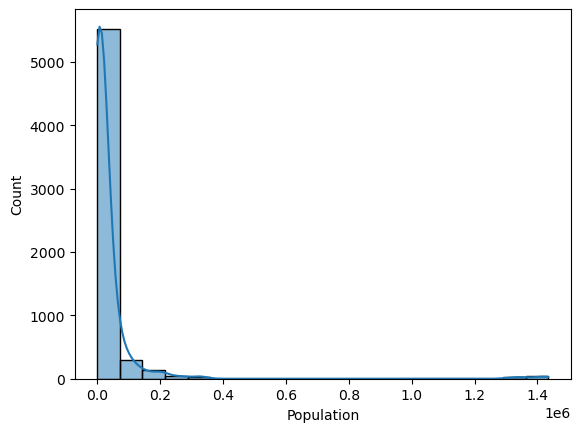

In [40]:
sns.histplot(df_sub_filtered_world_pair['Population'], bins = 20, kde = True)

Because of "outliers", data is so spread that there are basically 15 bins that are not visible.
Just for a test, I will create another subset that excludes the highest values of population.

In [41]:
# Create a new dataset to investigate
df_sub_filtered_world_pair_test_pop = df_sub_filtered_world_pair.loc[df_sub_filtered_world_pair['Population'] < 100000]

<Axes: xlabel='Population', ylabel='Count'>

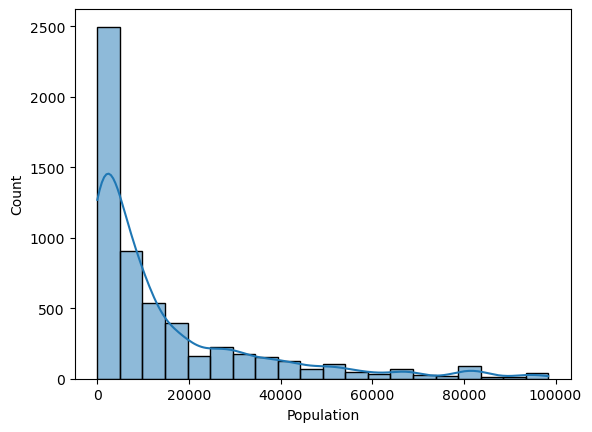

In [42]:
sns.histplot(df_sub_filtered_world_pair_test_pop['Population'], bins = 20, kde = True)

Well, now it makes more sense. However, how was already visible from the descriptive statistics, like almost 75% of data is clustered around low values. <br> 
Distributions is heaviliy right skewed and the shape is probably the same for all variables.

## 4.5 Categorical plot

Let's go back to our datasets who contains all variables but does not contains records with the "World" country: <br>
df_co2_2015_no_world

Let's create a categorical variable for CO2_emissions, splitting values in different categories. <br>
We create a scatterplot to better understand how to divide our categories.

<Axes: xlabel='CO2_emission', ylabel='Count'>

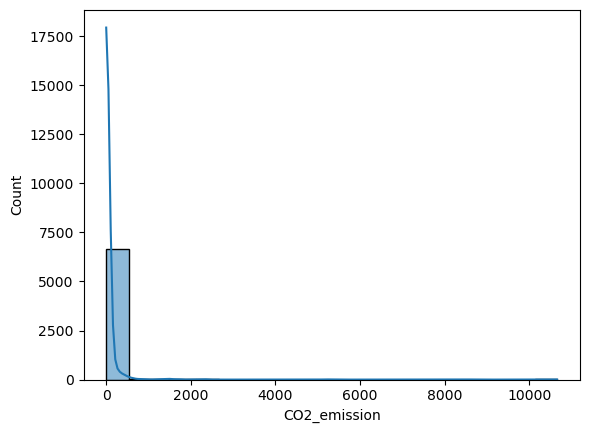

In [43]:
sns.histplot(df_co2_2015_no_world['CO2_emission'], bins = 20, kde = True)

Outliers are of course making it difficult seeing the distribution. <br>
Let's create a new dataset to check actual distribution.

In [44]:
df_co2_2015_no_world_test_co2 = df_co2_2015_no_world.loc[df_co2_2015_no_world['CO2_emission'] < 2000]

<Axes: xlabel='CO2_emission', ylabel='Count'>

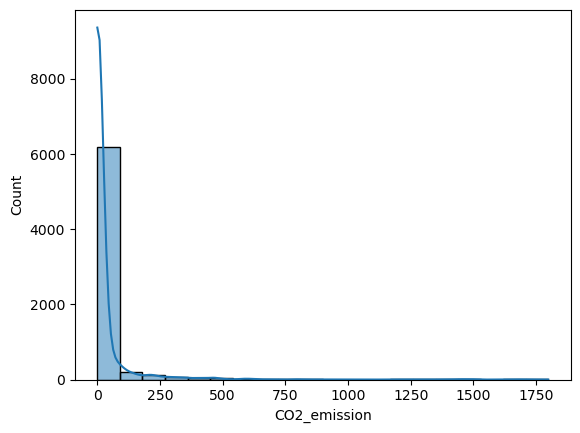

In [45]:
# Creating the scatterplot with the new dataframe
sns.histplot(df_co2_2015_no_world_test_co2['CO2_emission'], bins = 20, kde = True)

According to the scatterplot, the majority of values falls under 100, a low value. <br>
I will create categories using the following criteria: <br>
if <= 100 = Low <br>
if > 100 and <= 250 = Medium <br>
if > 250 = High

Now that we now the real distribution, let's create a new variable on our df_co2_2015_no_world.

In [46]:
# Creating first condition
df_co2_2015_no_world.loc[df_co2_2015_no_world['CO2_emission'] <= 100, 'CO2_category'] = 'Low'

C:\Users\Simone\AppData\Local\Temp\ipykernel_32872\3669524626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2_2015_no_world.loc[df_co2_2015_no_world['CO2_emission'] <= 100, 'CO2_category'] = 'Low'


In [47]:
# Creating second condition
df_co2_2015_no_world.loc[(df_co2_2015_no_world['CO2_emission'] > 100) & (df_co2_2015_no_world['CO2_emission'] <= 250), 'CO2_category'] = 'Medium'

In [48]:
# Creating last condition
df_co2_2015_no_world.loc[df_co2_2015_no_world['CO2_emission'] > 250, 'CO2_category'] = 'High'

In [49]:
# Checking the results
df_co2_2015_no_world.head(10)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,GDP_category,CO2_category
6,Afghanistan,all_energy_types,2015,0.13,0.04,72.06,34414.0,3.67,1.75,7.17,Medium-high,Low
7,Afghanistan,coal,2015,0.03,0.03,72.06,34414.0,3.67,1.75,2.95,Medium-high,Low
8,Afghanistan,natural_gas,2015,0.01,0.01,72.06,34414.0,3.67,1.75,0.28,Medium-high,Low
9,Afghanistan,petroleum_n_other_liquids,2015,0.07,0.00,72.06,34414.0,3.67,1.75,3.94,Medium-high,Low
10,Afghanistan,nuclear,2015,NaN,NaN,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low
11,Afghanistan,renewables_n_other,2015,0.02,0.01,72.06,34414.0,3.67,1.75,0.00,Medium-high,Low
12,Albania,all_energy_types,2015,0.12,0.10,33.60,2891.0,40.23,3.46,4.04,Medium,Low
13,Albania,coal,2015,0.00,0.00,33.60,2891.0,40.23,3.46,0.31,Medium,Low
14,Albania,natural_gas,2015,0.00,0.00,33.60,2891.0,40.23,3.46,0.06,Medium,Low
15,Albania,petroleum_n_other_liquids,2015,0.05,0.05,33.60,2891.0,40.23,3.46,3.67,Medium,Low


Perfect! Let's see also the count of values for the new variable.

In [50]:
# Checking the value count
df_co2_2015_no_world['CO2_category'].value_counts(dropna = False)

Low       6252
High       241
Medium     236
NaN        171
Name: CO2_category, dtype: int64

Great! It reflects the distributions seen in the histogram.

Now I will create the categorical plot using the energy consumption and let's see the result.

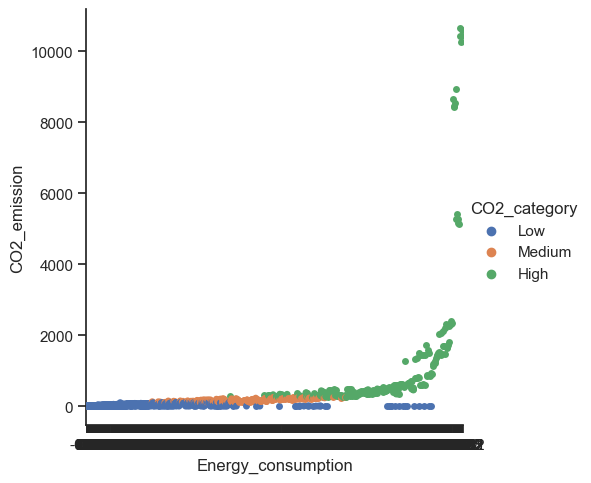

In [51]:
sns.set(style="ticks")
categorical = sns.catplot(x="Energy_consumption", y="CO2_emission", hue="CO2_category", data=df_co2_2015_no_world)

Low emissions are colored in blue, medium emissions in orange and high emissions in green. <br>
On the far left, when the energy_consumption is low, it doesn't exist any single green point. <br>
This seems another confirmation that high emissions are a product of an high energy consumption. <br>
Although the chart shows too that consumption can be high and still have low emissions (sources not polluting as much as coal).

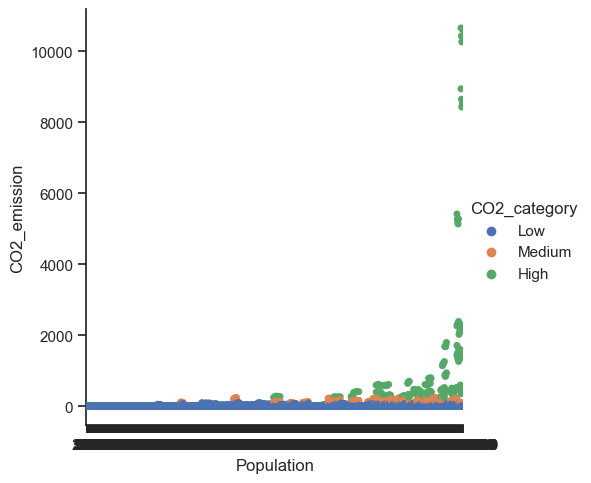

In [52]:
categorical_2 = sns.catplot(x="Population", y="CO2_emission", hue="CO2_category", data=df_co2_2015_no_world)

This chart also shows as the emissions become "medium" and "high" only after the population reach a certain amount (like around the middle of x axis). <br>
Still, it's possible to maintain low emissions even with an high number of population.

<function matplotlib.pyplot.show(close=None, block=None)>

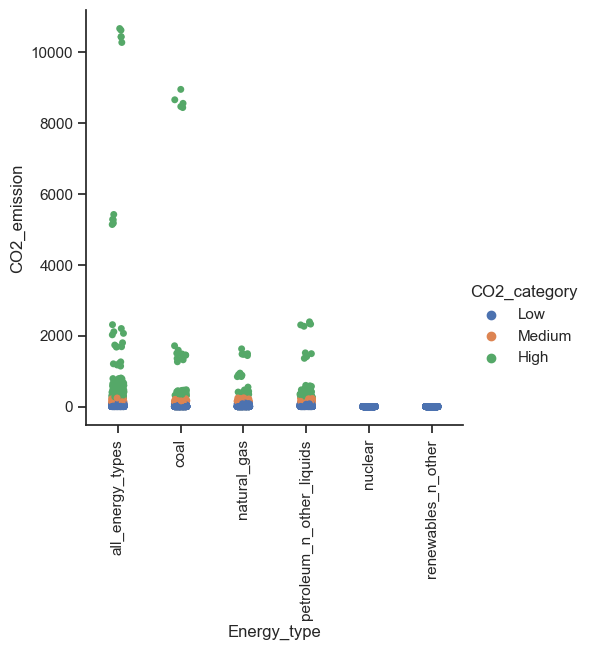

In [53]:
categorical_3 = sns.catplot(x="Energy_type", y="CO2_emission", hue="CO2_category", data=df_co2_2015_no_world)
plt.xticks(rotation=90)
plt.show

This charts show how coal and petroleum produce the highest emissions, while nuclear and renewables are the energy sources that contributes the less to pollution.

# 5. Key questions
** **

Here I will reply to some key questions I formulated after cleaning data.

• Is there a correlation between energy consumption and CO2 emissions? If yes, what kind of relationship is? <br>
According to my analsys, there is a strong linear correlation between energy consumption and CO2 emissions.

• Is there a correlation between GDP and CO2 emissions? If yes, what kind of relationship is? <br>
Despite the correlation coefficient is 0,7, the relationship doesn't seem linear.

• Is there a correlation between GDP and energy consumption? If yes, what kind of relationship is? <br>
There is a correlation coefficient of 0,7 between the two variables but I didn't investigate deeper the relationship.

• How spread is the data regarding GDP? <br>
Data is very spread, with India, China and USA being the countries with highest GDP.

• Which are the countries with highest CO2 emissions? <br>
Countries with highest emissions are China and USA.

• Which are the continents with highest CO2 emissions? (To answer this question a new variable should be derived). <br>
I din't create the variable yet, but according to questions above, should be America and Asia.

• What’s the trend in CO2 emissions in the last 5 years? The average is increasing or decreasing over the years? <br>
I can't answer because I didn't made a time series analysis yet.

# 6. Hypothesis
** **

Considering what we find out in these analysis, I will test the following research hypothesis:

<i> The average energy consumption of Countries with "high" CO2 emissions will be higher than the average energy consumption of Countries with "low" CO2 emissions </i>

<i>The average coal energy consumption of Countries with "high" CO2 emissions will be higher than the average coal energy consumption of Countries with "low" CO2 emissions </i>

# 7. Saving charts
** **

In [54]:
corr.figure.savefig("correlation_heatmap.png")

In [55]:
scatter_cons_prod.figure.savefig("scatterplot_consumption_production.png")

In [56]:
scatter_cons_co2.figure.savefig("scatterplot_consumption_co2.png")

In [57]:
scatter_prod_co2.figure.savefig("scatterplot_production_co2.png")

In [58]:
scatter_gdp_pop.figure.savefig("scatterplot_gdp_population.png")

In [59]:
scatter_co2_gdp.figure.savefig("scatterplot_co2_gdp.png")

In [60]:
scatter_co2_pop.figure.savefig("scatterplot_co2_population.png")

In [61]:
pair_no_world.figure.savefig("pairplot.png")

In [62]:
categorical.figure.savefig("categorical_co2_consumption.png")

In [63]:
categorical_2.figure.savefig("categorical_co2_population.png")

In [64]:
categorical_3.figure.savefig("categorical_co2_energytype.png")